In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # read in the plotting library matplotlib and call it plt
import statsmodels.api as sm # import stats package

Can you come up with a qualitative explanation for why superconductivity might break down under high current densities?
: First we must understand how temperature breaks up superconductivity. Based on the fact that nature favours lower energy states. There is a band gap energy (delta) between coupled paierd electrons and normal state electrons. If temperature(kT) is comparable to delta, essentially exciting the paired electrons, super conductivity breaks. In terms of fermi surface in k space, to illustrate band gap energy delta, one can draw another surface surrounding the original fermi surface, having a gap corresponding to delta. There are no states available in between those surfaces. Increasing T will increase the surface and at a certain T, two surfaces will meet, corresponding to breaking of symmetry. To explain why superconductivty breaks at high current, we use the ferim surface logic again. When current is turned on, fermi surface, as a sphere, gains a net momentum shfiting it. For high current densities, the sphere will be shfited until it contacts the other surface at delta gap energy, i.e. breaking superconductivity. 

# 4.1 Observation of the normal-superconductnig transition using the resistivity of tin wire 

## 4.1.1 Preliminary measurements 

1. Why is the four wire method preferable to using just two wires? 
To avoid contact messing up resistance measurements 
2. Why is it necessary to reverse the current through the sample? 
Applying current on the wire creates a Temperature gradient. By reverising current direction, one can cancel out that effect. Temperature is an important factor for this experiment 
3. How can one check that the current used for the resistance measurement is ont heating the sample? 
Just leave it and see if heats up. What is important is the rate of temperature difference. 

## 4.1.1 The normal-superconducting transition  

In [3]:
#Pressure to Temperature Converter
def pressure2temp(p_mbar): ## converts pressure of helium in mbar to temperature in K
    x = np.log10(p_mbar) ##note that log10() is used as opposed to log()
    T = 1.24177 + 0.23793*(x) + 0.36207*(x**2) - 0.33188*(x**3) + 0.20738*(x**4) - 0.05294*(x**5) + 0.00552*(x**6)
    return T

In [4]:
#Read File
ResistivityDataRemote = pd.read_csv("./../data/resistivity/ResistivityDataRemote.txt", "\t", names=["Helium Pressure", "V+", "V-"])
#Drop lines 
ResistivityDataRemote = ResistivityDataRemote.drop(ResistivityDataRemote.index[range(0,6)])

#Define Variables 
current = 1.002; #Value given in data file. Used in Lower regime

helium_pressure = ResistivityDataRemote['Helium Pressure'].values.astype(float)
v_plus = ResistivityDataRemote['V+'].values.astype(float)
v_minus = ResistivityDataRemote['V-'].values.astype(float)

Note that -V just indicates that current direction is flipped

In [5]:
#Calculation 
helium_temp = pressure2temp(helium_pressure)
v_average = (v_plus - v_minus)/2 #Note the - in front of v_minus 

resistance_plus = v_plus/current
resistance_minus = v_minus/current
resistance_average = v_average/current

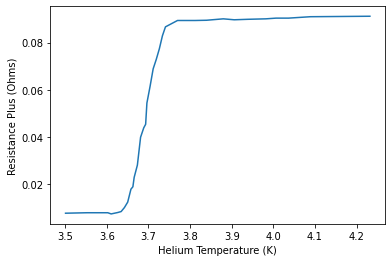

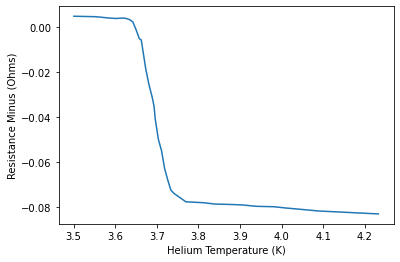

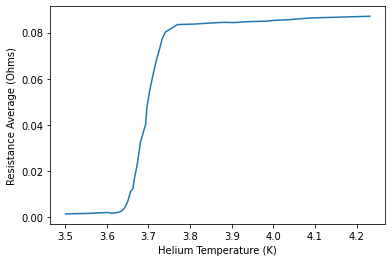

In [6]:
#Plot
plt.plot(helium_temp, resistance_plus)
## plt.title('Pressure against V')
plt.xlabel('Helium Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance Plus (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.show()

plt.plot(helium_temp, resistance_minus)
## plt.title('Pressure against V')
plt.xlabel('Helium Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance Minus (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.show()

plt.plot(helium_temp, resistance_average)
## plt.title('Pressure against V')
plt.xlabel('Helium Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance Average (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.show()

In [7]:
#Calculate Linear Fit for the transition of Resistance 

##Selecting transition range 
helium_temp_trans = []
resistance_plus_trans = []
for i in range(len(resistance_plus)):
    if resistance_plus[i] > 0.02 and resistance_plus[i] < 0.08:
        helium_temp_trans.append(helium_temp[i])
        resistance_plus_trans.append(resistance_plus[i])        
helium_temp_trans = np.array(helium_temp_trans)
resistance_plus_trans = np.array(resistance_plus_trans)

## add linear fit
X = sm.add_constant(helium_temp_trans) # add a constant to fit
results = sm.OLS(resistance_plus_trans, X).fit() # save results of fit


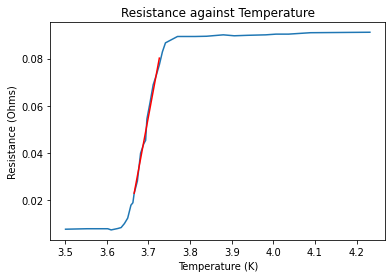

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     477.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.04e-08
Time:                        11:10:15   Log-Likelihood:                 46.697
No. Observations:                  10   AIC:                            -89.39
Df Residuals:                       8   BIC:                            -88.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4412      0.160    -21.520      0.0

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
#Plot with Fit & Summary 
plt.plot(helium_temp, resistance_plus)
plt.plot(helium_temp_trans, results.params[0]+results.params[1]*helium_temp_trans, 'r' , label='fitted_line')
plt.title('Resistance against Temperature')
plt.xlabel('Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.show()

print(results.summary()) # print results out to screen

In [9]:
#Calculating the critical temperature
R_min = min(resistance_plus)
R_max = max(resistance_plus)
Rc = (R_min + R_max)/2 #Selecting around the middle point of the transition range 

Tc = (Rc- results.params[0])/results.params[1]
print(Tc)

3.693474566320118


Note that Critical(Transition) Temperature isn't really defined precisely. A bit arbitrary. We chose the middel point 
Why is the width of the transition finite? 
This phenomenon is a 2nd order Gibbs phase transition. Finite width comes from impurities of the material used.  

## 4.1.3 The critical magnetic field 

In [10]:
file=pd.read_csv("./../data/resistivity/ProbeA3mB", "\t")
file
pressure2temp(3)

1.411170942905004

From script, we know that shunt giving 0.5V/A provides 0.018T/A at the center. (Conversion of Volt to Tesla) 

In [11]:
#Grand scheme 
pressureList = [3 ,21, 43, 58, 74, 92, 130, 170, 210, 250, 290, 330, 370, 400, 430, 450, 473, 500, 520, 540, 560, 570, 595, 610, 630, 890 ] #1010 not using 

ratio = 0.018/0.5 

Bc = []

for num in pressureList:
    filename = "./../data/resistivity/ProbeA"+str(num)+"mB"
    df = df = pd.read_csv(filename, "\t",names=["Acquisition Time (ms)", "Shunt Voltage (V)", "Sample Voltage (V)","Integrated Sample Voltage (V)","N/A","N/A2"])
    df = df.drop(df.index[range(0,2)])
    B = df["Shunt Voltage (V)"].values.astype(float)*ratio
    V = df["Sample Voltage (V)"].values.astype(float)
    B_trans = []
    V_trans = []
    for i in range(len(V)):
        if V[i] > 0.00001 and V[i] < 0.00008:
            B_trans.append(B[i])
            V_trans.append(V[i])         
    B_trans = np.array(B_trans)
    #B_midpoint = ( B_trans[0]+ B_trans[len(B_trans)-1] )*0.5
    if len(B_trans) != 0:
        Bc.append(( B_trans[0]+ B_trans[len(B_trans)-1] )*0.5 )





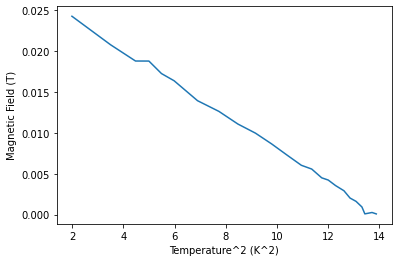

In [12]:
#Plot Bc and T 
temp = [] 
for i in range(len(pressureList)):
    temp.append(pressure2temp(pressureList[i]))
temp_c = temp[:len(Bc)]

temp_square = [element**2 for element in temp_c]
temp_square = np.array(temp_square)

plt.plot(temp_square,Bc)
plt.xlabel('Temperature^2 (K^2)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.153e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.01e-31
Time:                        11:10:16   Log-Likelihood:                 159.30
No. Observations:                  24   AIC:                            -314.6
Df Residuals:                      22   BIC:                            -312.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0284      0.000    146.089      0.0

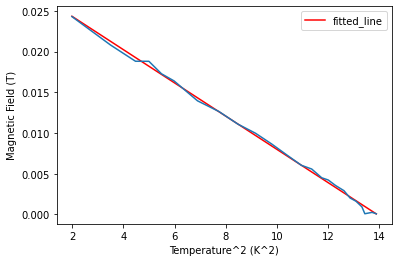

In [13]:
## add linear fit
Lfit = sm.add_constant(temp_square) # add a constant to fit
results = sm.OLS(Bc, Lfit).fit() # save results of fit
print(results.summary())

#Add fit to graph
plt.plot(temp_square, results.params[0]+results.params[1]*temp_square, 'r' , label='fitted_line')
plt.plot(temp_square,Bc)
plt.xlabel('Temperature^2 (K^2)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.legend()
plt.show()

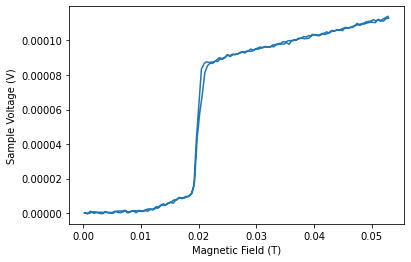

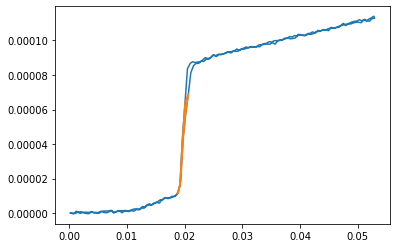

In [14]:
##Procedure for one pressure 
df = pd.read_csv("./../data/resistivity/ProbeA58mB", "\t",names=["Acquisition Time (ms)", "Shunt Voltage (V)", "Sample Voltage (V)","Integrated Sample Voltage (V)","N/A","N/A2"])
df = df.drop(df.index[range(0,2)])
df

#plot B versus time 
ratio = 0.018/0.5 

t = df["Acquisition Time (ms)"].values.astype(float)
B = df["Shunt Voltage (V)"].values.astype(float)*ratio
V = df["Sample Voltage (V)"].values.astype(float)
iV = df["Integrated Sample Voltage (V)"].values.astype(float)

plt.plot(B, V)
## plt.title('Pressure against V')
plt.xlabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Sample Voltage (V)') # Plot a label on x axis of Xlabel on graph
plt.show()

#Extract Bc
B_trans = []
V_trans = []
for i in range(len(V)):
    if V[i] > 0.00001 and V[i] < 0.00008:
        B_trans.append(B[i])
        V_trans.append(V[i])
                
B_trans = np.array(B_trans)

B_midpoint = ( B_trans[0]+ B_trans[len(B_trans)-1] )*0.5

plt.plot(B,V)
plt.plot(B_trans,V_trans)
plt.xlabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Sample Voltage (V)') # Plot a label on x axis of Xlabel on graph
plt.show()




In [17]:
results.params[0]

0.028401566892467547

In [105]:
#Calculate Tc
Tc = np.sqrt(results.params[0]/abs(results.params[1]))       
print("Critical Temperature: "+str(Tc)+"K")

Critical Temperature: 3.730571349577056K


Questions:
Can you explain the sahpe of the transition between superconducting and normal behaviour
Until B=0.014T, for all temperature, material is superconducting. After that point, there is a small increase in resistance(sample voltage, they are similar as current is 1), and superconductivity is broken around critical magnetic field. How can we explain the small increment before critcal magnetic field? Think about a sphere in uniform magnetic field. Due to boundary conditions, magnetic flux density are squeezed together at the edges of the sphere, increasing the density. So, flux density at edges are actually larger than applied field. For cylinder, it gives a factor of 2. Now, the probe for this experiment is made of a coil of wire wrapped around a rectangular material. The wires on the sides that are perpendicular to appiled field will experience the above effect. So, at B=0.014T, the two sides will experience "early" as if there is 0.028T. This tendency can be seen in graphs. 
Does the transition look different for upsweeps and downsweeps of the magnetic field? 
This is a fundamental property of superconductors. When downsweeping, around critcial magnetic field, a loop of current is produced around the superconducting path of the material, as there is no resistance. Then, the decrement of magnetic field is countered by the increase of current in superconductors because induced current is the rate of flux change. So after critical magnetic field, magentic field inside the superconductor will not decrease. There will still be large flux density inside. Won't see the tenedency of the left sied of the above graph. 

## 4.2 The Meissner Effect in Tin

In [58]:
ddf = pd.read_csv("./../data/meissner_effect/ProbeB80mbar","\t", names = ["Acquisition Time (ms)", "Shunt Voltage (V)", "Sample Voltage (V)","Integrated Sample Voltage (V)","N/A"])
ddf = ddf.drop(ddf.index[range(0,2)])
ddf

,Acquisition Time (ms),Shunt Voltage (V),Sample Voltage (V),Integrated Sample Voltage (V),N/A
2,9933750,0.0113017242,5.7455022E-6,4.5455022E-6,NaN
3,9934000,0.0232247586,2.1404448E-6,5.4859469E-6,NaN
4,9934250,0.036030491,4.1537169E-6,8.4396638E-6,NaN
5,9934500,0.0477310741,3.7277462E-6,1.096741E-5,NaN
6,9934750,0.060276027,4.0416193E-6,1.38090293E-5,NaN
...,...,...,...,...,...
238,9992750,0.0516333573,-2.11892674E-5,1.299903031E-4,NaN
239,9993000,0.0393370663,-2.11533963E-5,1.076369068E-4,NaN
240,9993250,0.0268615244,-1.68712794E-5,8.95656274E-5,NaN
241,9993500,0.0145754424,-1.47638501E-5,7.36017773E-5,NaN


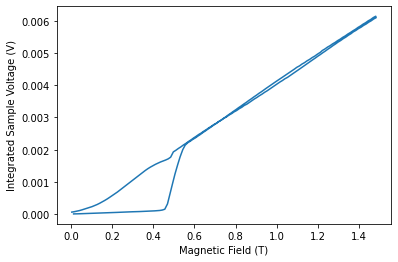

In [62]:
B = ddf["Shunt Voltage (V)"].values.astype(float)*ratio
iV = ddf["Integrated Sample Voltage (V)"].values.astype(float)
V = ddf["Sample Voltage (V)"].values.astype(float)

plt.plot(B,iV)
plt.xlabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Integrated Sample Voltage (V)') # Plot a label on x axis of Xlabel on graph
plt.show()


4.221493495675776


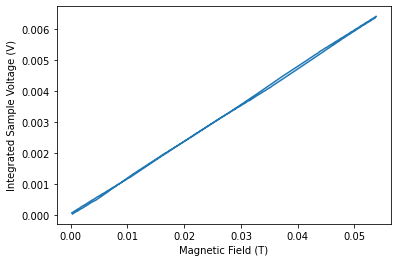

In [61]:
#Sweeping current at 4.2K
print(pressure2temp(1010))
ddf_4K = pd.read_csv("./../data/meissner_effect/ProbeB1010mbar","\t", names = ["Acquisition Time (ms)", "Shunt Voltage (V)", "Sample Voltage (V)","Integrated Sample Voltage (V)","N/A"])
ddf_4K = ddf_4K.drop(ddf_4K.index[range(0,2)])
B_4K = ddf_4K["Shunt Voltage (V)"].values.astype(float)*ratio
iV_4K = ddf_4K["Integrated Sample Voltage (V)"].values.astype(float)
V_4K = ddf_4K["Sample Voltage (V)"].values.astype(float)

plt.plot(B_4K,iV_4K)
plt.xlabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Integrated Sample Voltage (V)') # Plot a label on x axis of Xlabel on graph
plt.show()

Note that it is a stragiht line. It is because the temperature is above critical temperature, so no superconductivity can be seen. 

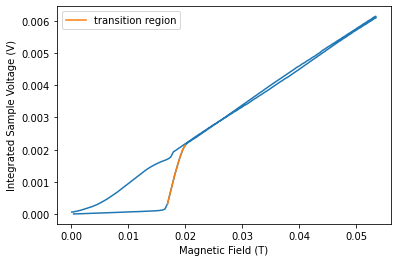

In [82]:
#Seeing where transition part is 
ddf = pd.read_csv("./../data/meissner_effect/ProbeB80mbar", "\t",names=["Acquisition Time (ms)", "Shunt Voltage (V)", "Sample Voltage (V)","Integrated Sample Voltage (V)","N/A"])
ddf = ddf.drop(ddf.index[range(0,2)])
B = ddf["Shunt Voltage (V)"].values.astype(float)*ratio
iV = ddf["Integrated Sample Voltage (V)"].values.astype(float)
B_trans = []
iV_trans = []
before = iV[0]
for i in range(int(len(iV)/2)):
    after = iV[i]
    if after-before >= 0.0001:
        B_trans.append(B[i])
        iV_trans.append(iV[i])
    before = after
B_trans = np.array(B_trans)

plt.plot(B,iV)
plt.plot(B_trans,iV_trans,label='transition region')
plt.xlabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Integrated Sample Voltage (V)') # Plot a label on x axis of Xlabel on graph
plt.legend()
plt.show()

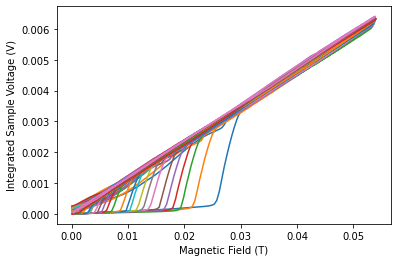

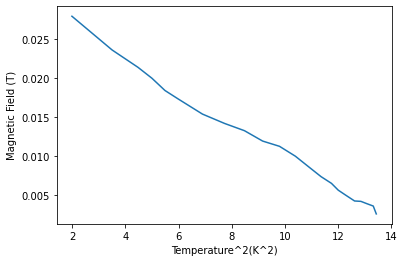

In [112]:
#Grand Scheme 
pressure_list_m = [2,20,41,58,80,98,132,165,190,220,238,270,320,360,390,410,440,460,470,480,490,525,540,590,690,720,1010]

Bc_m = []

for num in pressure_list_m:
    filename = "./../data/meissner_effect/ProbeB"+str(num)+"mbar"
    ddf = pd.read_csv(filename, "\t",names=["Acquisition Time (ms)", "Shunt Voltage (V)", "Sample Voltage (V)","Integrated Sample Voltage (V)","N/A"])
    ddf = ddf.drop(ddf.index[range(0,2)])
    B = ddf["Shunt Voltage (V)"].values.astype(float)*ratio
    iV = ddf["Integrated Sample Voltage (V)"].values.astype(float)
    plt.plot(B,iV)
    plt.xlabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
    plt.ylabel('Integrated Sample Voltage (V)') # Plot a label on x axis of Xlabel on graph
    B_trans = []
    iV_trans = []
    before = iV[0]
    for i in range(int(len(iV)/2)):
        after = iV[i]
        if after-before >= 0.0001:
            B_trans.append(B[i])
            iV_trans.append(iV[i])
        before = after
    B_trans = np.array(B_trans)
    #B_midpoint = ( B_trans[0]+ B_trans[len(B_trans)-1] )*0.5
    if len(B_trans) != 0:
        Bc_m.append(( B_trans[0]+ B_trans[len(B_trans)-1] )*0.5 )
Bc_m = np.array(Bc_m)     

plt.show()
        
temp_m = temp[:len(Bc_m)]

temp_square_m = [elements**2 for elements in temp_m]
temp_square_m = np.array(temp_square_m)
plt.plot(temp_square_m,Bc_m)
plt.ylabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.xlabel('Temperature^2(K^2)') # Plot a label on x axis of Xlabel on graph
plt.show()



How to explain the shape of the transition between superconducting and normal behaviour?
note that integrated sample voltage repersents flux inside the material. 
we can see a very small increment of flux around 0.014T as explaiend previously. 
Another interesting part of this graph is the downsweep of magnetic field. One would expect flux to be constant despite the decrease of B because, as explained previously, as soon as the material hits critical field, a loop of current is induced and the current will cancel out the effect of decreasing magnetic field. However that is not the case in here. The reason lies in Tin. Tin has an abnormal tendency to show semiconductor characteristics at low temperature. (Tin's phase transition). The tiny dip during downsweep is due to the small portion of Tin acting metallic but soon to be domianted by semi-conducting attributes.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3049.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.44e-23
Time:                        16:45:06   Log-Likelihood:                 132.72
No. Observations:                  22   AIC:                            -261.4
Df Residuals:                      20   BIC:                            -259.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0306      0.000     83.274      0.0

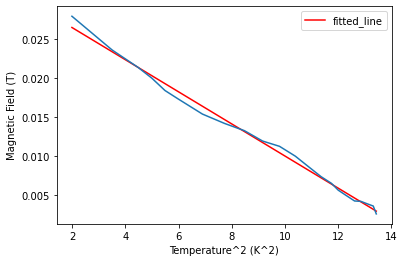

In [113]:
#Add fit

## add linear fit
Lfit_m = sm.add_constant(temp_square_m) # add a constant to fit
results_m = sm.OLS(Bc_m, Lfit_m).fit() # save results of fit
print(results_m.summary())

#Add fit to graph
plt.plot(temp_square_m, results_m.params[0]+results_m.params[1]*temp_square_m, 'r' , label='fitted_line')
plt.plot(temp_square_m,Bc_m)
plt.xlabel('Temperature^2 (K^2)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.legend()
plt.show()

In [114]:
#Compare with previous part 
#print(results.summary())
#print(results_m.summary())

B_0_error = np.absolute((results.params[0]-results_m.params[0])*100/results_m.params[0])
print("B_0 percentage difference: "+str(B_0_error)+"%")
T_c_m = np.sqrt(-results_m.params[0]/results_m.params[1])
print("Critcal Temperature: "+str(T_c_m)+"K")
T_c_diff = np.absolute((Tc-T_c_m)/T_c_m)
print(T_c_diff)

B_0 percentage difference: 7.305030358838928%
Critcal Temperature: 3.8527174193064657K
0.03170387454769454


In [115]:
#gamma
gamma = (2/(4*np.pi*10**(-7)))*(results_m.params[0]/T_c_m)**2
print(gamma)
T_c_m

100.66026892968311


3.8527174193064657